In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
from impyute.imputation.cs import mice
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
target_variable=['Item_Outlet_Sales']
def identify_column_types(df):
    """Identify numerical and categorical columns"""
    numerical_cols = []
    categorical_cols = []
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            numerical_cols.append(col)
        else:
            categorical_cols.append(col)
    return  (numerical_cols, categorical_cols)

In [3]:
def plot_violin_distributions(df, numerical_cols, figsize=(30, 10)):

    _, ax = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=figsize)
    
    for index, col in enumerate(numerical_cols):
        sns.violinplot(data=df, y=col, ax=ax[index], inner='quartile')
        ax[index].set_title(f'{col} distribution')
        ax[index].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

def plot_box_distributions(df, numerical_cols, figsize=(30, 10)):
    _, ax = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=figsize)
    
    for index, col in enumerate(numerical_cols):
        sns.boxplot(data=df, y=col, ax=ax[index])
        ax[index].set_title(f'{col} distribution')
        ax[index].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

In [4]:
training_data=pd.read_csv('train_v9rqX0R.csv')
training_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# ProfileReport(training_data)

In [6]:
display(training_data.info())
display(training_data.describe(include='all').T)
display(training_data.isnull().sum().sort_values(ascending=False))

# training_data = training_data.apply(pd.to_numeric, errors='coerce')
# # Check for Infinite values
# print(np.isinf(training_data).sum())
# training_data[np.isinf(training_data).any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,8523,1559,FDW13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,7060.0,NaN,NaN,NaN,12.857645,4.643456,4.555,8.77375,12.6,16.85,21.35
Item_Fat_Content,8523,5,Low Fat,5089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,8523.0,NaN,NaN,NaN,0.066132,0.051598,0.0,0.026989,0.053931,0.094585,0.328391
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,8523.0,NaN,NaN,NaN,140.992782,62.275067,31.29,93.8265,143.0128,185.6437,266.8884
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,8523.0,NaN,NaN,NaN,1997.831867,8.37176,1985.0,1987.0,1999.0,2004.0,2009.0
Outlet_Size,6113,3,Medium,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# identify catagorical and numerical variable

In [7]:
numerical_cols,categorical_variables=identify_column_types(training_data)

print(f"Categorical variables: {categorical_variables}")
print(f"Numerical variables: {numerical_cols}")
print(f"Target variables: {target_variable}")



Categorical variables: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Numerical variables: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
Target variables: ['Item_Outlet_Sales']


| Variable                    | Description                                                                                                                                      | Data Type  | Type        |
|-----------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|------------|-------------|
| `Item_Weight`                | Weight of product                                                                                                                                  | `float64`  | Numerical   |
| `Item_Visibility`            | The % of total display area of all products in a store allocated to the particular product                                                      | `float64`  | Numerical   |
| `Item_MRP`                   | Maximum Retail Price (list price) of the product                                                                                                 | `float64`  | Numerical   |
| `Outlet_Establishment_Year`  | The year in which store was established                                                                                                           | `int64`    | Numerical   |
| `Item_Identifier`            | Unique product ID                                                                                                                                 | `object`   | Categorical |
| `Item_Fat_Content`           | Whether the product is low fat or not                                                                                                            | `object`   | Categorical |
| `Item_Type`                  | The category to which the product belongs                                                                                                         | `object`   | Categorical |
| `Outlet_Identifier`          | Unique store ID                                                                                                                                   | `object`   | Categorical |
| `Outlet_Size`                | The size of the store in terms of ground area covered                                                                                             | `object`   | Categorical |
| `Outlet_Location_Type`       | The type of city in which the store is located                                                                                                    | `object`   | Categorical |
| `Outlet_Type`                | Whether the outlet is just a grocery store or some sort of supermarket                                                                            | `object`   | Categorical |
| `Item_Outlet_Sales`          | Sales of the product in the particular store (Target variable to be predicted)                                                                   | `float64`  | Target/Label |

In [8]:

print("\nUnique values in each categorical variable:")
print("-" * 50)
for categorical_col in categorical_variables:
    unique_values = training_data[categorical_col].unique()
    value_count = len(unique_values)
    print(f"\n{categorical_col} ({value_count} unique values):")
    print(unique_values)
    print("-" * 50)


Unique values in each categorical variable:
--------------------------------------------------

Item_Identifier (1559 unique values):
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
--------------------------------------------------

Item_Fat_Content (5 unique values):
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
--------------------------------------------------

Item_Type (16 unique values):
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
--------------------------------------------------

Outlet_Identifier (10 unique values):
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
--------------------------------------------------

Outlet_Size (4 unique values):
['Medium' nan 'High' 'Small']
--------------------------------------------------

Outlet_Location_Type (3 unique value

In [9]:
# Standardize fat content
fat_content_mapping = {
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
}

# Define a mapping dictionary to group the Item_Type values
item_type_mapping = {
    'Dairy': 'Food',
    'Soft Drinks': 'Beverages',
    'Meat': 'Food',
    'Fruits and Vegetables': 'Food',
    'Household': 'Non-Consumable',
    'Baking Goods': 'Food',
    'Snack Foods': 'Food',
    'Frozen Foods': 'Food',
    'Breakfast': 'Food',
    'Health and Hygiene': 'Non-Consumable',
    'Hard Drinks': 'Beverages',
    'Canned': 'Food',
    'Breads': 'Food',
    'Starchy Foods': 'Food',
    'Others': 'Others',    
    'Seafood': 'Food'
}

# Create the new feature in training_data using the mapping dictionary
training_data['Item_Type_Grouped'] = training_data['Item_Type'].map(item_type_mapping)
training_data['Item_Fat_Content'] = training_data['Item_Fat_Content'].replace(fat_content_mapping)

In [10]:
#check for duplicates 

training_data[training_data.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Grouped


In [11]:
# Group by Item_Identifier and aggregate unique Item_Type values
grouped_data = training_data.groupby("Item_Identifier").agg({"Item_Weight": "unique"})

# Sort by the number of unique values in Item_Type
sorted_data = grouped_data.assign(unique_count=grouped_data["Item_Weight"].apply(len)).sort_values(by="unique_count", ascending=False)

# Display the result
display(sorted_data)


# Filter rows where there is more than one unique value apart from NaN
multiple_weights = grouped_data[grouped_data["Item_Weight"].apply(lambda x: len([i for i in x if not pd.isna(i)]) > 1)]


multiple_weights


,Item_Weight,unique_count
Item_Identifier,,
FDQ08,"[nan, 15.7]",2
FDU19,"[nan, 8.77]",2
FDU13,"[8.355, nan]",2
FDU12,"[15.5, nan]",2
FDU11,"[4.785, nan]",2
...,...,...
FDF38,[11.8],1
FDF39,[14.85],1
FDV44,[8.365],1


,Item_Weight
Item_Identifier,


In [12]:
# For each Item_Identifier, get the non-null weight value
item_weights = training_data.groupby('Item_Identifier')['Item_Weight'].apply(lambda x: x.dropna().iloc[0] if len(x.dropna()) > 0 else np.nan)

# Fill NaN values with the corresponding weight for each Item_Identifier
training_data['Item_Weight'] = training_data.apply(lambda row: item_weights[row['Item_Identifier']] if pd.isna(row['Item_Weight']) else row['Item_Weight'], axis=1)

In [13]:
# Group by Item_Identifier and aggregate unique Item_Type values
grouped_data = training_data.groupby("Item_Identifier").agg({"Item_Weight": "unique"})

# Sort by the number of unique values in Item_Type
sorted_data = grouped_data.assign(unique_count=grouped_data["Item_Weight"].apply(len)).sort_values(by="unique_count", ascending=False)

# Display the result
display(sorted_data)


# Filter rows where there is more than one unique value apart from NaN
multiple_weights = grouped_data[grouped_data["Item_Weight"].apply(lambda x: len([i for i in x if not pd.isna(i)]) > 1)]


multiple_weights


,Item_Weight,unique_count
Item_Identifier,,
DRA12,[11.6],1
FDV10,[7.645],1
FDV36,[18.7],1
FDV35,[19.5],1
FDV34,[10.695],1
...,...,...
FDJ16,[9.195],1
FDJ15,[11.35],1
FDJ14,[10.3],1


,Item_Weight
Item_Identifier,


In [14]:
# Group by Item_Identifier and aggregate unique Item_Type values
grouped_data = training_data.groupby("Outlet_Identifier").agg({"Outlet_Size": "unique"})

# Sort by the number of unique values in Item_Type
sorted_data = grouped_data.assign(unique_count=grouped_data["Outlet_Size"].apply(len)).reset_index().sort_values(by="Outlet_Identifier", ascending=False)

# Display the result
display(sorted_data)




,Outlet_Identifier,Outlet_Size,unique_count
9,OUT049,[Medium],1
8,OUT046,[Small],1
7,OUT045,[nan],1
6,OUT035,[Small],1
5,OUT027,[Medium],1
4,OUT019,[Small],1
3,OUT018,[Medium],1
2,OUT017,[nan],1
1,OUT013,[High],1
0,OUT010,[nan],1


In [15]:
# Create a function for the common aggregation and display logic
def analyze_outlet_sizes(data, group_cols):
    grouped = data.groupby(group_cols).agg({
        'Outlet_Size': 'unique',
        'Outlet_Identifier': lambda x: sorted(set(x))  # Using set for unique values
    }).reset_index()
    
    grouped['unique_size_count'] = grouped['Outlet_Size'].apply(len)
    return grouped.sort_values(by=group_cols, ascending=False)

# Perform outlet  analyses 
analyses = {
    'By Type and Location': analyze_outlet_sizes(training_data, ['Outlet_Type', 'Outlet_Location_Type']),
    'By Location': analyze_outlet_sizes(training_data, ['Outlet_Location_Type']),
    'By Type': analyze_outlet_sizes(training_data, ['Outlet_Type'])
}

# Display all results
for title, result in analyses.items():
    print(f"\n{title}:")
    display(result)



By Type and Location:


,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Identifier,unique_size_count
6,Supermarket Type3,Tier 3,[Medium],[OUT027],1
5,Supermarket Type2,Tier 3,[Medium],[OUT018],1
4,Supermarket Type1,Tier 3,[High],[OUT013],1
3,Supermarket Type1,Tier 2,"[nan, Small]","[OUT017, OUT035, OUT045]",2
2,Supermarket Type1,Tier 1,"[Medium, Small]","[OUT046, OUT049]",2
1,Grocery Store,Tier 3,[nan],[OUT010],1
0,Grocery Store,Tier 1,[Small],[OUT019],1



By Location:


,Outlet_Location_Type,Outlet_Size,Outlet_Identifier,unique_size_count
2,Tier 3,"[Medium, nan, High]","[OUT010, OUT013, OUT018, OUT027]",3
1,Tier 2,"[nan, Small]","[OUT017, OUT035, OUT045]",2
0,Tier 1,"[Medium, Small]","[OUT019, OUT046, OUT049]",2



By Type:


,Outlet_Type,Outlet_Size,Outlet_Identifier,unique_size_count
3,Supermarket Type3,[Medium],[OUT027],1
2,Supermarket Type2,[Medium],[OUT018],1
1,Supermarket Type1,"[Medium, High, nan, Small]","[OUT013, OUT017, OUT035, OUT045, OUT046, OUT049]",4
0,Grocery Store,"[nan, Small]","[OUT010, OUT019]",2


In [16]:
numerical_cols,categorical_variables=identify_column_types(training_data)

print(f"Categorical variables: {categorical_variables}")
print(f"Numerical variables: {numerical_cols}")
print(f"Target variables: {target_variable}")



Categorical variables: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Type_Grouped']
Numerical variables: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
Target variables: ['Item_Outlet_Sales']


In [17]:
def preprocess_and_impute(training_data, selected_columns, categorical_variables):

    # Create a copy of the selected columns
    df = training_data[selected_columns].copy()
    
    # Encode categorical variables as numeric codes
    mappings = {}
    for col in categorical_variables:
        df[col] = df[col].astype("category")
        mappings[col] = dict(enumerate(df[col].cat.categories))
        df[col] = df[col].cat.codes.replace(-1, np.nan)
    
    # Convert DataFrame to numpy array and apply MICE imputation
    imputed_array = mice(df.values)
    
    # Convert back to DataFrame
    df_imputed = pd.DataFrame(imputed_array, columns=df.columns)
    
    # Convert Outlet_Size back to original categories
    df_imputed['Outlet_Size'] = df_imputed['Outlet_Size'].round().astype(int).map(mappings['Outlet_Size'])
    
    return df_imputed['Outlet_Size']

# Select the columns to use
cols = [
    "Item_Identifier", "Item_Weight", "Item_Fat_Content", "Item_Visibility",
    "Item_Type", "Item_MRP", "Outlet_Identifier", "Outlet_Establishment_Year",
    "Outlet_Size", "Outlet_Location_Type", "Outlet_Type","Item_Type_Grouped"
]



training_data['Outlet_Size'] = preprocess_and_impute(
    training_data=training_data,
    selected_columns=cols,
    categorical_variables=categorical_variables
)





In [18]:
# Perform outlet  analyses 
analyses = {
    'By Type and Location': analyze_outlet_sizes(training_data, ['Outlet_Type', 'Outlet_Location_Type']),
    'By Location': analyze_outlet_sizes(training_data, ['Outlet_Location_Type']),
    'By Type': analyze_outlet_sizes(training_data, ['Outlet_Type'])
}

# Display all results
for title, result in analyses.items():
    print(f"\n{title}:")
    display(result)


By Type and Location:


,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Identifier,unique_size_count
6,Supermarket Type3,Tier 3,[Medium],[OUT027],1
5,Supermarket Type2,Tier 3,[Medium],[OUT018],1
4,Supermarket Type1,Tier 3,[High],[OUT013],1
3,Supermarket Type1,Tier 2,"[Medium, Small]","[OUT017, OUT035, OUT045]",2
2,Supermarket Type1,Tier 1,"[Medium, Small]","[OUT046, OUT049]",2
1,Grocery Store,Tier 3,[High],[OUT010],1
0,Grocery Store,Tier 1,[Small],[OUT019],1



By Location:


,Outlet_Location_Type,Outlet_Size,Outlet_Identifier,unique_size_count
2,Tier 3,"[Medium, High]","[OUT010, OUT013, OUT018, OUT027]",2
1,Tier 2,"[Medium, Small]","[OUT017, OUT035, OUT045]",2
0,Tier 1,"[Medium, Small]","[OUT019, OUT046, OUT049]",2



By Type:


,Outlet_Type,Outlet_Size,Outlet_Identifier,unique_size_count
3,Supermarket Type3,[Medium],[OUT027],1
2,Supermarket Type2,[Medium],[OUT018],1
1,Supermarket Type1,"[Medium, High, Small]","[OUT013, OUT017, OUT035, OUT045, OUT046, OUT049]",3
0,Grocery Store,"[High, Small]","[OUT010, OUT019]",2


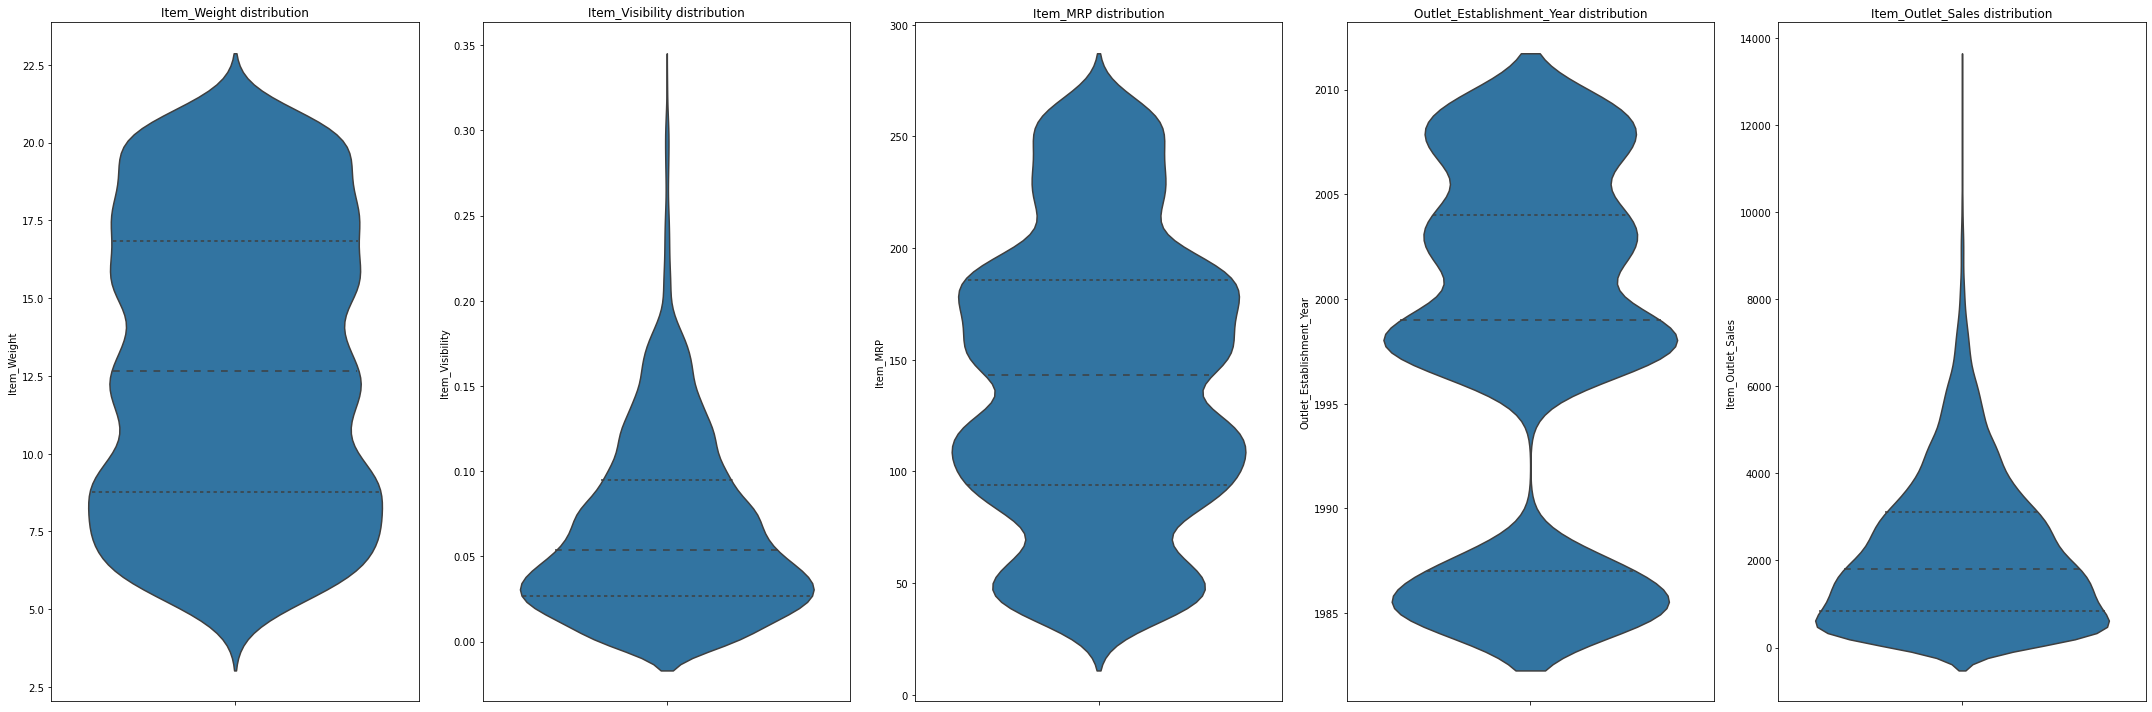

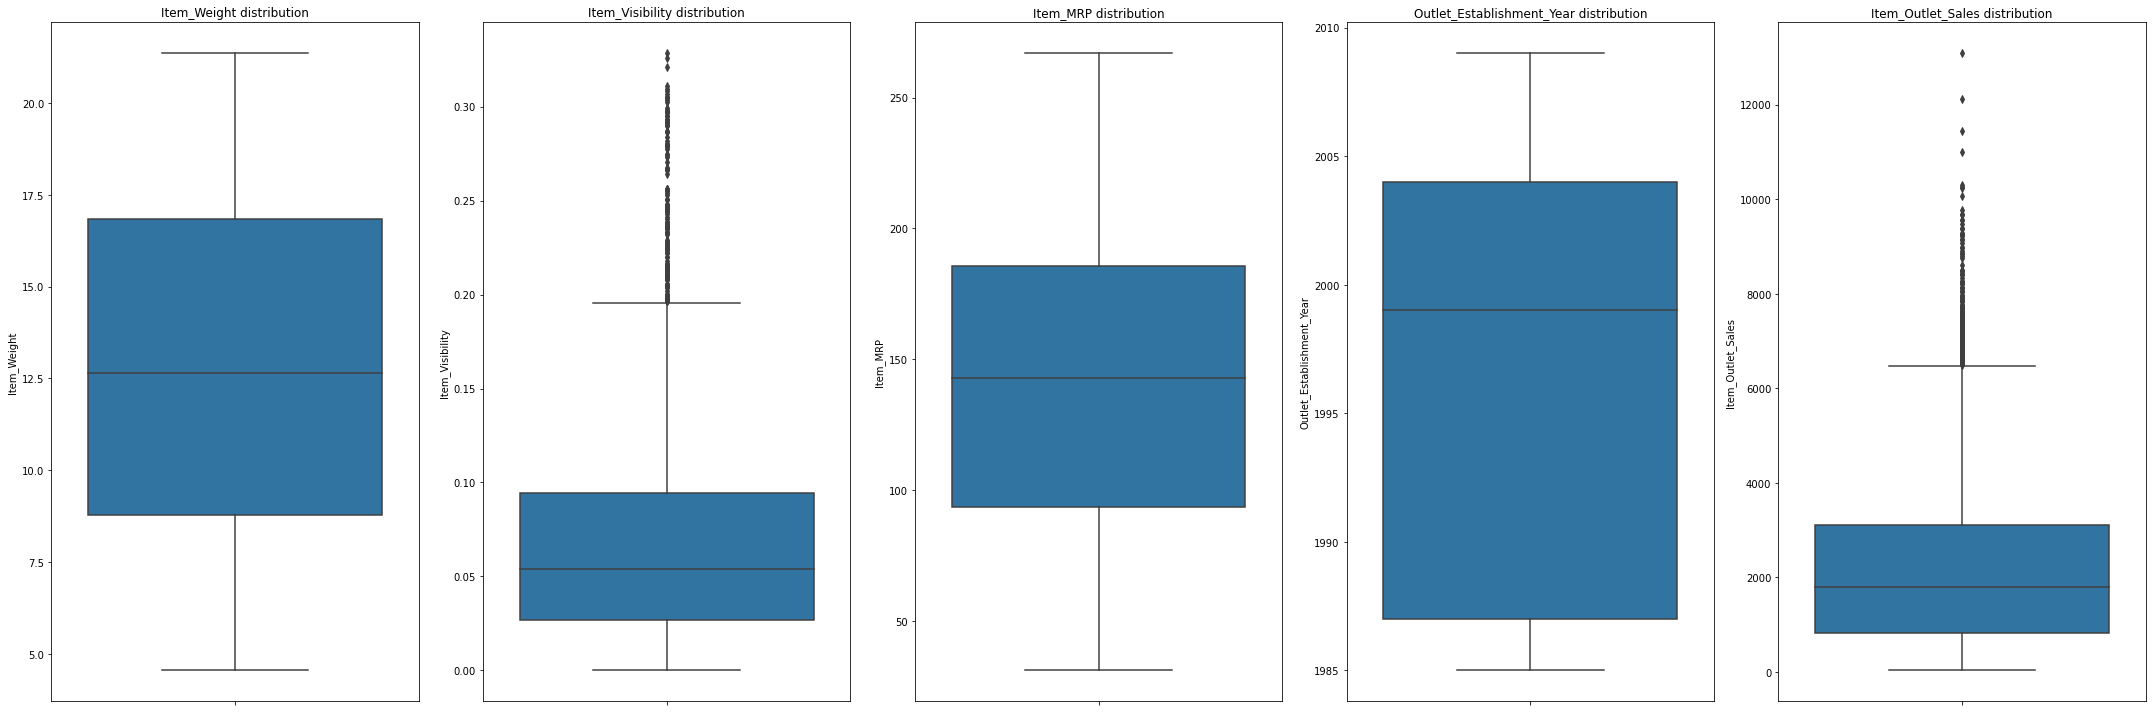

In [19]:

numerical_cols,categorical_variables=identify_column_types(training_data)
# Plot violin distributions
plot_violin_distributions(training_data, numerical_cols)

# Plot box distributions
plot_box_distributions(training_data, numerical_cols)

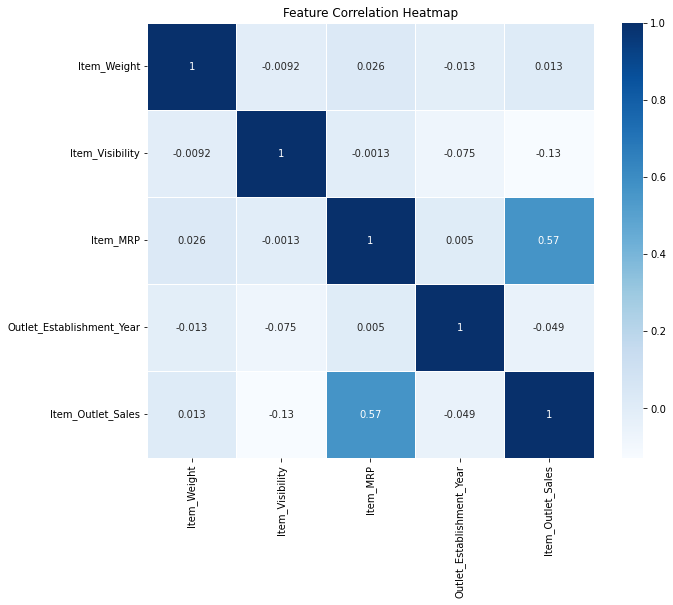

In [20]:

# Compute the correlation matrix
corr = training_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues', cbar=True, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [21]:
# training_data.to_csv('training_data.csv')

In [22]:
# 1. Handling Item Visibility - Adjusting zero values
# Replace zero values with the median of Item_Visibility
training_data['Item_Visibility'] = training_data['Item_Visibility'].replace(
    0, training_data['Item_Visibility'].median()
)

# Outlet Age Category: Categorizing store age
# Compute the outlet's age from its establishment year
training_data['Outlet_Age'] = 2025 - training_data['Outlet_Establishment_Year']


#Create Establishment_Decade:
#    Derive a feature representing the decade in which the outlet was established.
training_data['Establishment_Decade'] = (training_data['Outlet_Establishment_Year'] // 10) * 10



# Create age categories based on the computed Outlet_Age
training_data['Outlet_Age_Category'] = pd.cut(
    training_data['Outlet_Age'], 
    bins=[0, 10, 20, 30, 40], 
    labels=['New', 'Medium', 'Old', 'Very Old']
)

# 3. Price per Unit Weight: A derived feature
training_data['Price_per_Unit_Weight'] = training_data['Item_MRP'] / training_data['Item_Weight']

# 4. Item MRP Binned: Binning the Item_MRP into quartiles
training_data['Item_MRP_Binned'] = pd.qcut(
    training_data['Item_MRP'], 
    q=4, 
    labels=['Low', 'Medium', 'High', 'Very High']
)




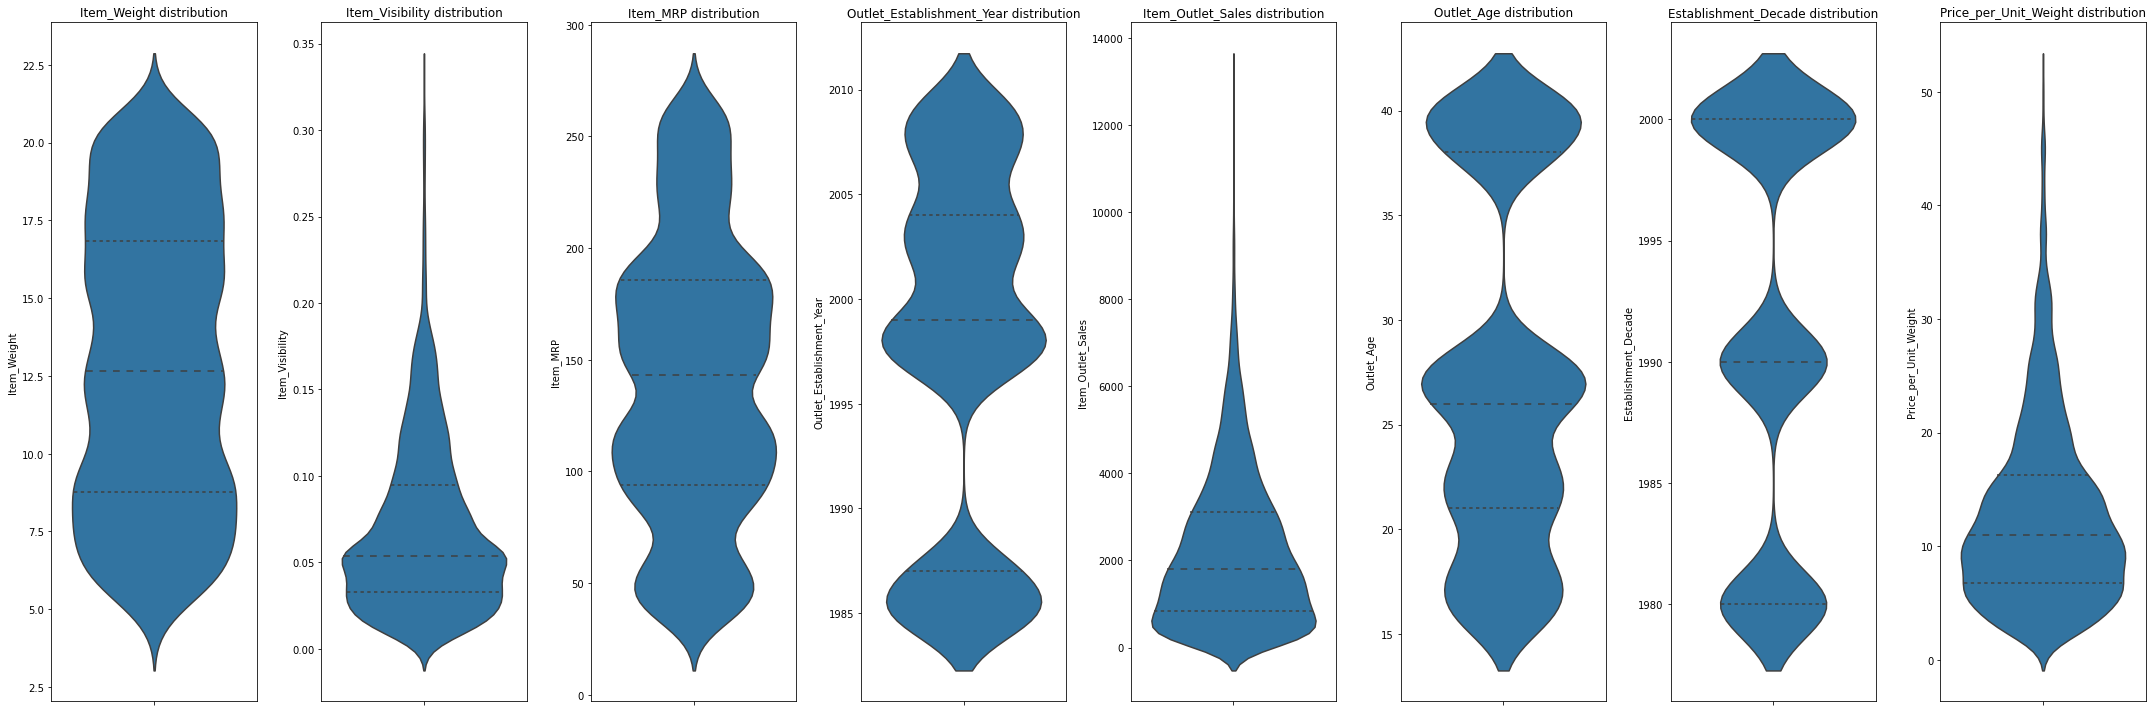

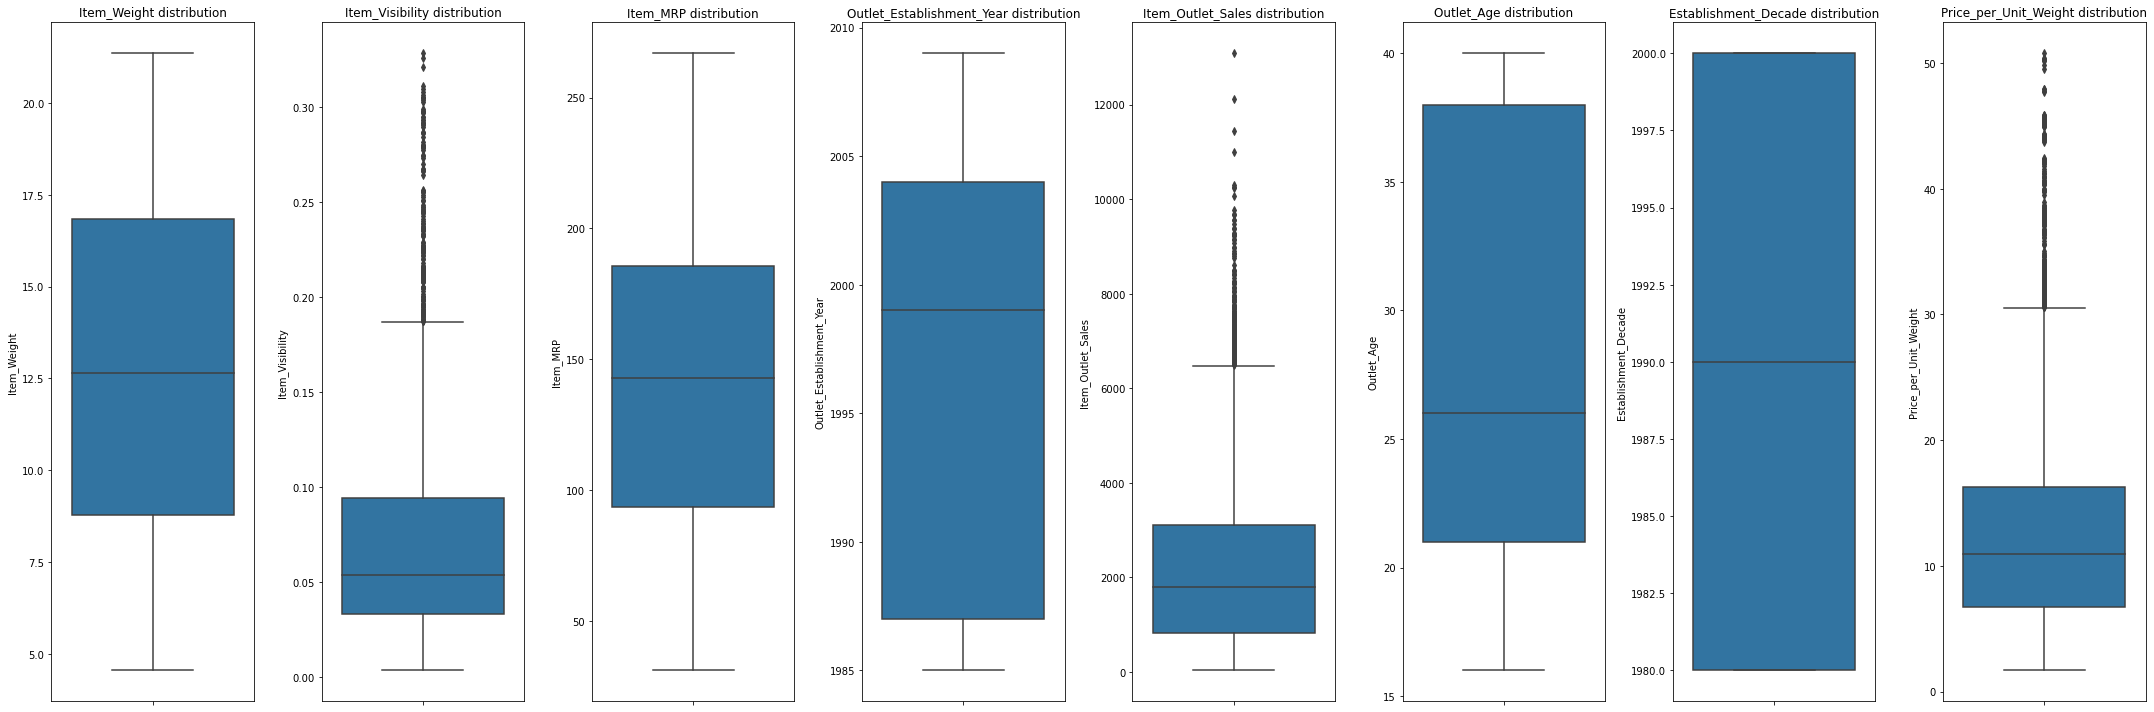

In [23]:

numerical_cols,categorical_variables=identify_column_types(training_data)
# Plot violin distributions
plot_violin_distributions(training_data, numerical_cols)

# Plot box distributions
plot_box_distributions(training_data, numerical_cols)

In [24]:
def detect_and_remove_outliers(train_df, test_df, numerical_cols, threshold=1.5):
    # Store initial number of rows
    initial_rows = len(train_df)
    print(f"Initial number of rows: {initial_rows}")
    
    # Process each numerical column
    for col in numerical_cols:
        print(f"\nDetecting outliers in {col}")
        
        # Calculate IQR statistics
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate outlier bounds
        upper_limit = Q3 + threshold * IQR
        lower_limit = Q1 - threshold * IQR
        
        # Print IQR bounds
        print(f"IQR bounds: [{lower_limit:.2f}, {upper_limit:.2f}]")
        
        # Remove rows outside IQR bounds and calculate removals
        rows_before = len(train_df)
        train_df = train_df[(train_df[col] >= lower_limit) & (train_df[col] <= upper_limit)]
        rows_iqr_removed = rows_before - len(train_df)
        print(f"IQR-based removals: {rows_iqr_removed} ({(rows_iqr_removed/rows_before)*100:.2f}%)")
        
        # Process test set range if column exists
        if col in test_df.columns.tolist():
            # Get test set bounds
            test_min = test_df[col].min()
            test_max = test_df[col].max()
            print(f"Test set bounds: [{test_min:.2f}, {test_max:.2f}]")
            
            # Remove rows outside test set range and calculate removals
            rows_before_test = len(train_df)
            train_df = train_df[(train_df[col] >= test_min) & (train_df[col] <= test_max)]
            rows_test_removed = rows_before_test - len(train_df)
            print(f"Test range-based removals: {rows_test_removed} ({(rows_test_removed/rows_before)*100:.2f}%)")
        
        # Print total removals for this column
        total_removed_col = rows_before - len(train_df)
        print(f"Total rows removed for {col}: {total_removed_col} ({(total_removed_col/rows_before)*100:.2f}%)")
    
    # Print final statistics
    final_rows = len(train_df)
    total_removed = initial_rows - final_rows
    print(f"\nFinal number of rows: {final_rows}")
    print(f"Total rows removed: {total_removed} ({(total_removed/initial_rows)*100:.2f}%)")
    
    return train_df

In [25]:
testing_data=pd.read_csv('test_AbJTz2l.csv')
testing_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [26]:
training_data = detect_and_remove_outliers(training_data,testing_data, numerical_cols)

Initial number of rows: 8523

Detecting outliers in Item_Weight
IQR bounds: [-3.31, 28.95]
IQR-based removals: 4 (0.05%)
Test set bounds: [4.55, 21.35]
Test range-based removals: 0 (0.00%)
Total rows removed for Item_Weight: 4 (0.05%)

Detecting outliers in Item_Visibility
IQR bounds: [-0.06, 0.19]
IQR-based removals: 173 (2.03%)
Test set bounds: [0.00, 0.32]
Test range-based removals: 0 (0.00%)
Total rows removed for Item_Visibility: 173 (2.03%)

Detecting outliers in Item_MRP
IQR bounds: [-44.03, 323.63]
IQR-based removals: 0 (0.00%)
Test set bounds: [31.99, 266.59]
Test range-based removals: 9 (0.11%)
Total rows removed for Item_MRP: 9 (0.11%)

Detecting outliers in Outlet_Establishment_Year
IQR bounds: [1961.50, 2029.50]
IQR-based removals: 0 (0.00%)
Test set bounds: [1985.00, 2009.00]
Test range-based removals: 0 (0.00%)
Total rows removed for Outlet_Establishment_Year: 0 (0.00%)

Detecting outliers in Item_Outlet_Sales
IQR bounds: [-2486.76, 6498.87]
IQR-based removals: 186 (2.23

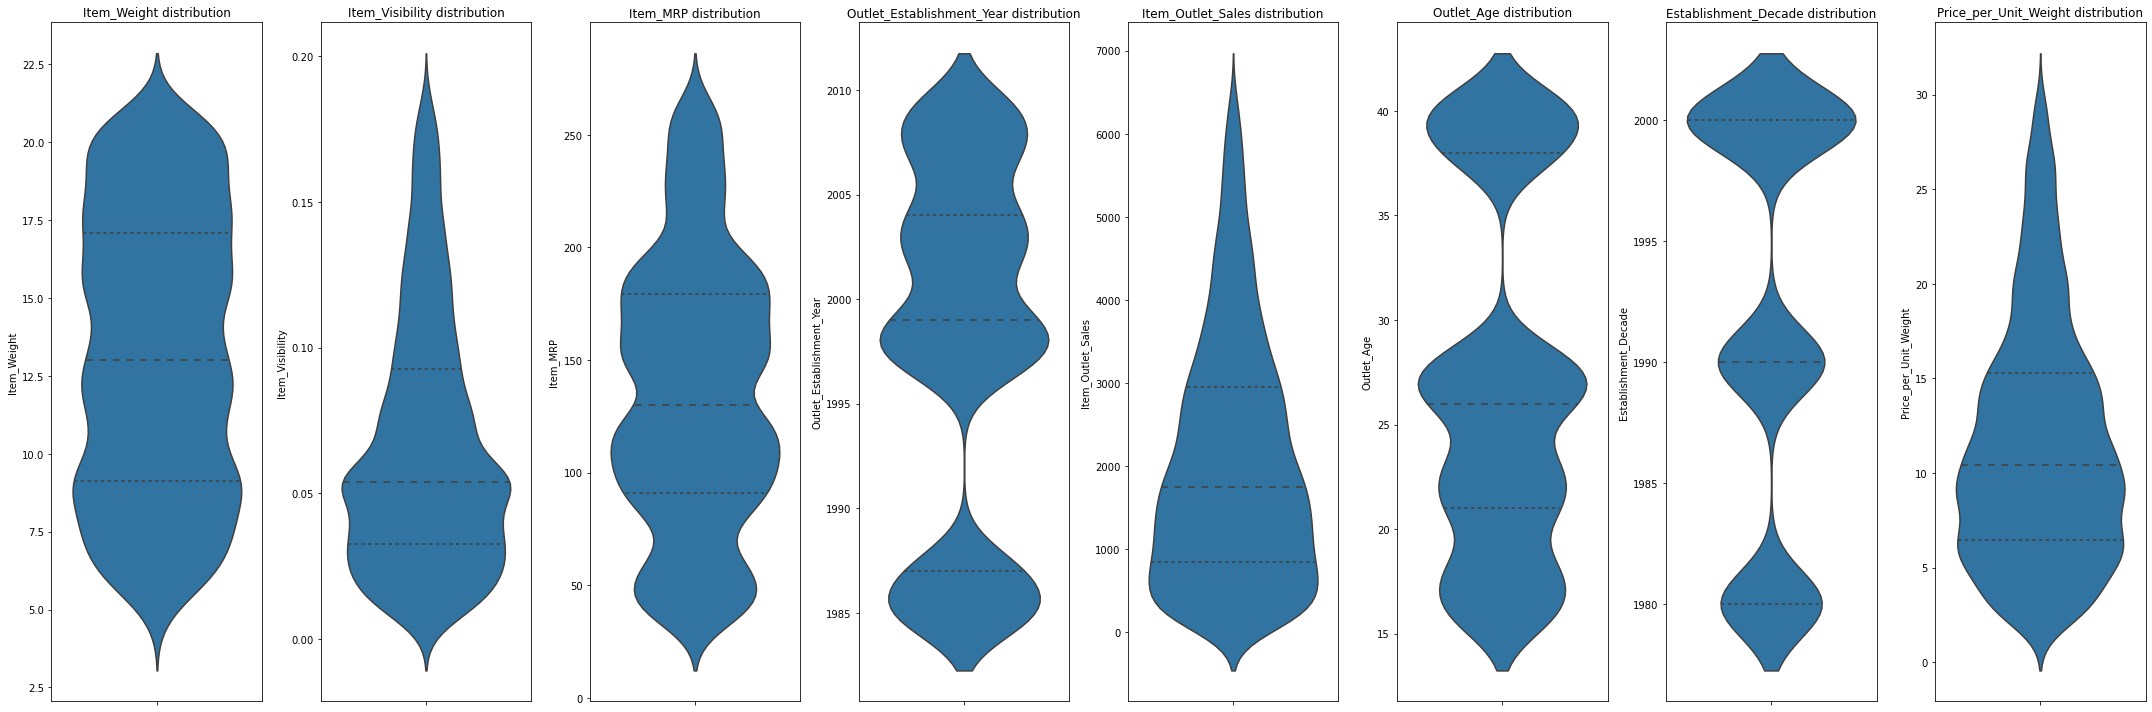

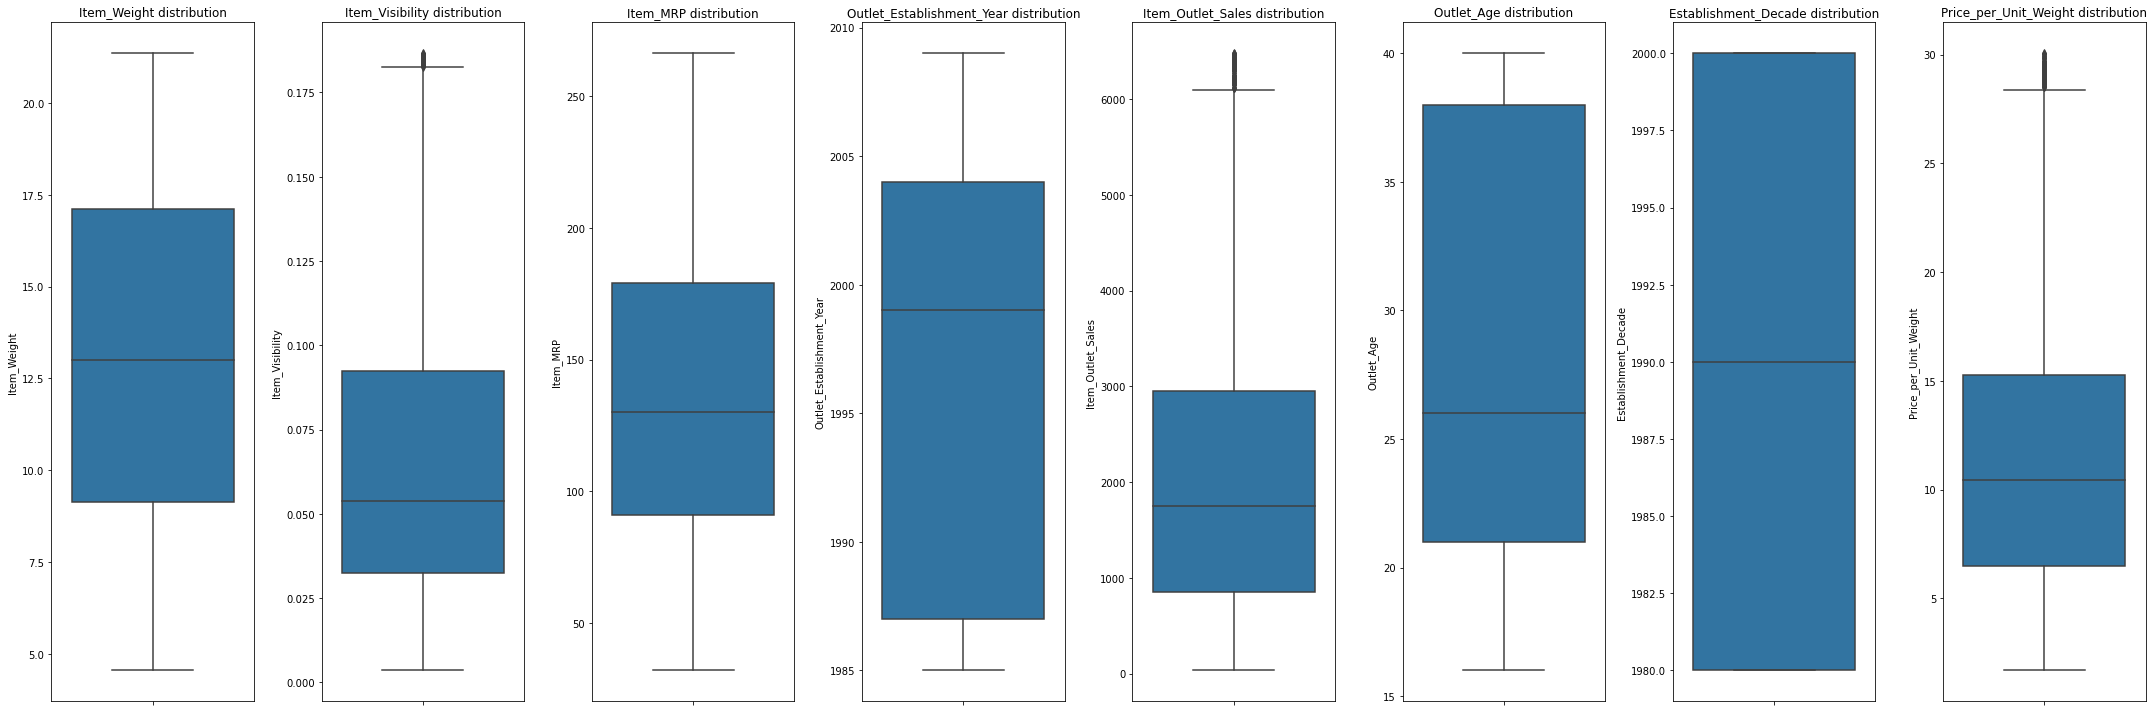

In [27]:

numerical_cols,categorical_variables=identify_column_types(training_data)
# Plot violin distributions
plot_violin_distributions(training_data, numerical_cols)

# Plot box distributions
plot_box_distributions(training_data, numerical_cols)

In [28]:
#Apply Log Transform to Reduce Skewness

# Apply log transformation to highly skewed variables
training_data['Item_Outlet_Sales'] = np.log1p(training_data['Item_Outlet_Sales'])  # log(1+x) to handle zero values
training_data['Item_Visibility'] = np.log1p(training_data['Item_Visibility'])
training_data['Price_per_Unit_Weight'] = np.log1p(training_data['Price_per_Unit_Weight'])



#Apply If some numerical features contain many outliers, use RobustScaler
	# •	When the dataset has many outliers, since it does not get affected by extreme values.
	# •	Best for Decision Trees, Random Forests, XGBoost, which handle outliers better
num_cols = ['Item_Weight',  'Item_MRP', 'Outlet_Age']

from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
training_data[num_cols] = robust_scaler.fit_transform(training_data[num_cols])




In [29]:
# Check for Infinite values
print(np.isinf(training_data['Item_Weight']).sum())

0


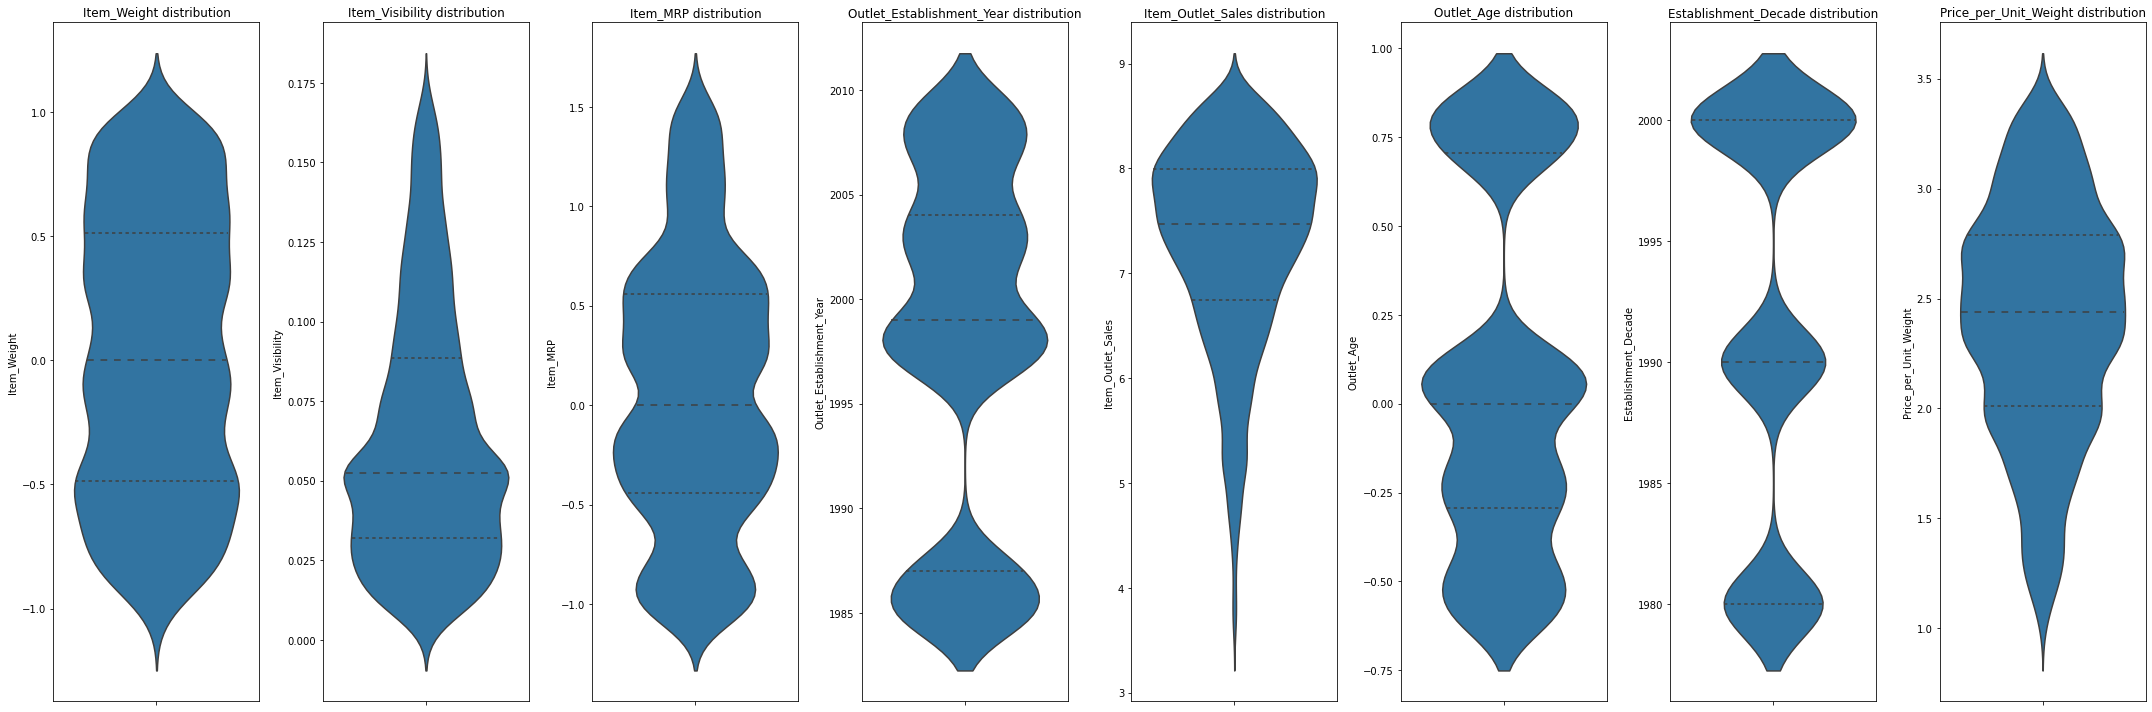

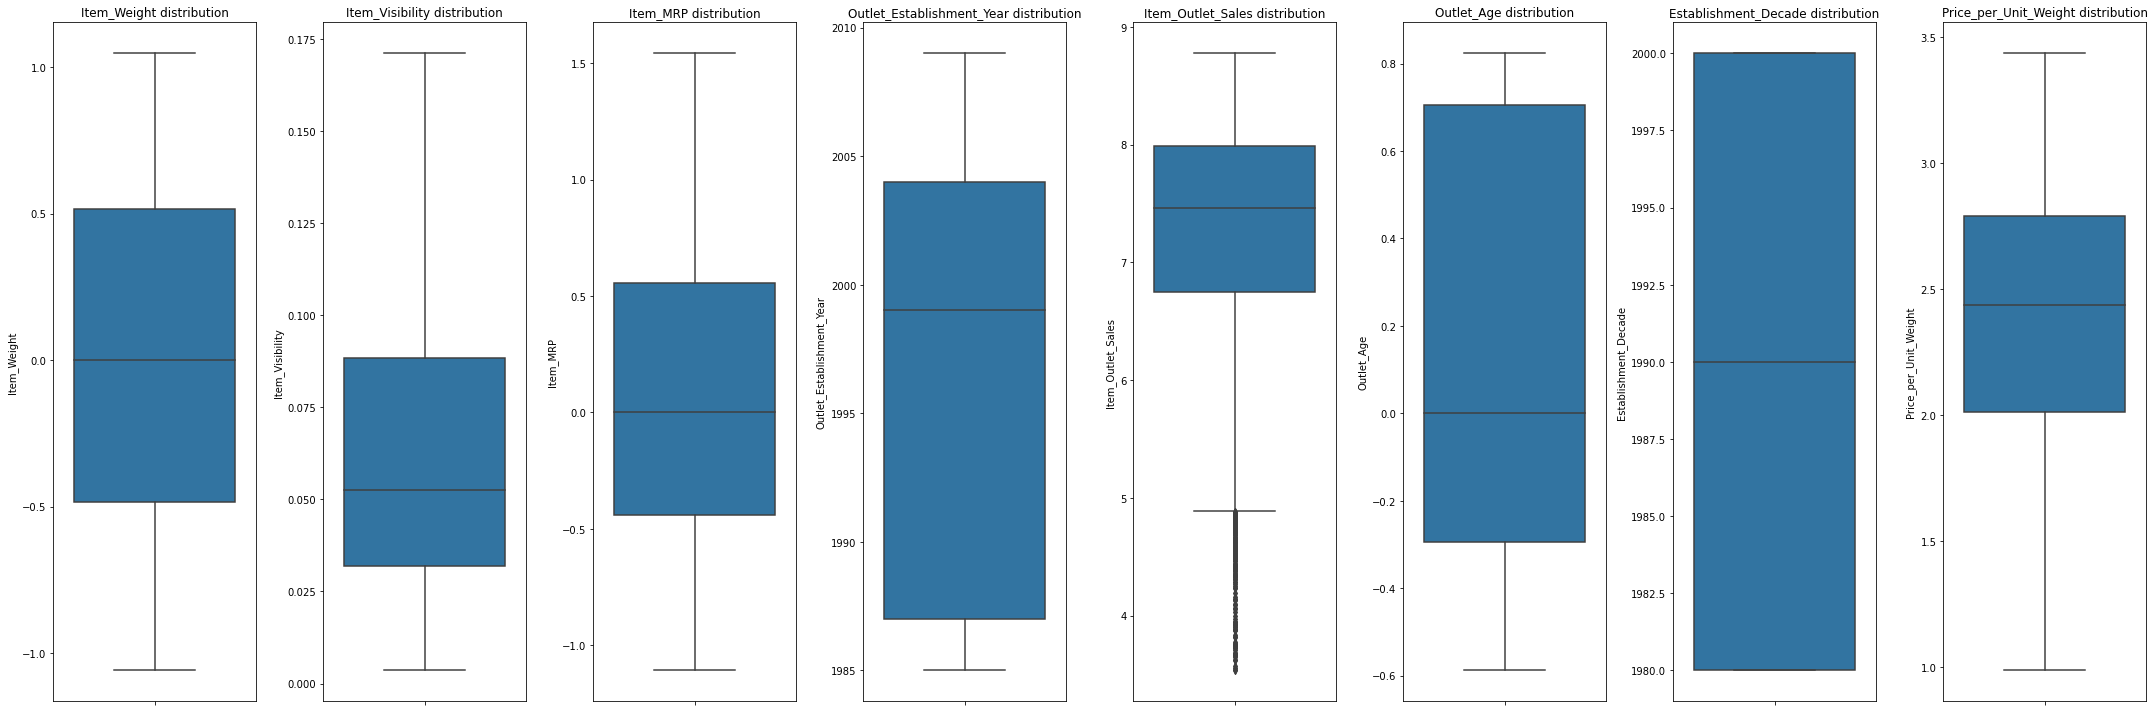

In [30]:

numerical_cols,categorical_variables=identify_column_types(training_data)
# Plot violin distributions
plot_violin_distributions(training_data, numerical_cols)

# Plot box distributions
plot_box_distributions(training_data, numerical_cols)

In [31]:
from sklearn.preprocessing import OrdinalEncoder

# Define categorical columns
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
                      'Outlet_Location_Type', 'Outlet_Type', 'Item_Type_Grouped',
                      'Outlet_Age_Category', 'Item_MRP_Binned']

# Define ordering for ordinal variables
ordering_dict = {
    'Item_Fat_Content': ['Low Fat', 'Regular'],
    'Outlet_Size': ['Small', 'Medium', 'High'],
    'Outlet_Location_Type': ['Tier 3', 'Tier 2', 'Tier 1'],
    'Outlet_Type': ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
    'Item_Type_Grouped': ['Food', 'Beverages', 'Non-Consumable','Others'],
    'Outlet_Age_Category': ['New', 'Medium', 'Old', 'Very Old'],
    'Item_MRP_Binned': ['Low', 'Medium', 'High', 'Very High']
}

# Create categories list for encoder
categories = []
for col in categorical_columns:
    if col in ordering_dict:
        categories.append(ordering_dict[col])
    else:
        # For columns not in ordering_dict, get unique values from the data
        unique_vals = sorted(training_data[col].unique())
        categories.append(unique_vals)

# Apply OrdinalEncoder with the categories
encoder = OrdinalEncoder(categories=categories)

# Transform categorical features
training_data[categorical_columns] = encoder.fit_transform(training_data[categorical_columns])

# Convert to integer type
training_data[categorical_columns] = training_data[categorical_columns].astype(int)

In [32]:
#4️⃣ Reverse Log Transformation After Prediction
# Reverse log transformation (convert back to original scale)
y_pred_actual = np.expm1(y_pred_log)

NameError: name 'y_pred_log' is not defined

In [33]:
numerical_cols,categorical_variables=identify_column_types(training_data)

print(f"Categorical variables: {categorical_variables}")
print(f"Numerical variables: {numerical_cols}")
print(f"Target variables: {target_variable}")



Categorical variables: ['Item_Identifier']
Numerical variables: ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_Grouped', 'Outlet_Age', 'Establishment_Decade', 'Outlet_Age_Category', 'Price_per_Unit_Weight', 'Item_MRP_Binned']
Target variables: ['Item_Outlet_Sales']
